# Leetcode - day 3

### Find First and Last Position of Element in Sorted Array
    
Given an integer array nums and an integer val, remove all occurrences of val in nums in-place. The relative order of the elements may be changed.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

Do not allocate extra space for another array. You must do this by modifying the input array in-place with O(1) extra memory.

In [16]:
    def removeElement(nums,val):
        val_index=[]
        for i in range(len(nums)):
            if(nums[i]==val):
                val_index.append(i)
        for i in range(len(val_index)):
            nums.remove(val)
        print(nums)    
        return len(nums)        

In [18]:
removeElement([3,2,2,3],2)

2

### Container With Most Water

Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers.

If such an arrangement is not possible, it must rearrange it as the lowest possible order (i.e., sorted in ascending order).

The replacement must be in place and use only constant extra memory.

### solution:

suppose arr is already sorted in descending order: 5431 -> no larger permutation possible


arr is already sorted in ascending order: 1356 -> swapping the last two digits(or 1 st two digits from right where arr[i]>arr[i+1]) 

for other sequence like: 1528176 
parse from the right untill we find a number arr[i] which is lesser than it's right number. for us it's 1 (note we are considering i from right side)

find the next bigger number of 1 in right side, which is 6 in our case. swap these two. The sequence now became:
1528671 and the pivot index is(original index of 1) -3


fix the numbers in the left side of pivot_index : 1528
reverse the numbers in the right side of pivot_index: 17
So the answer is: 1528 6 17 -> 1528617

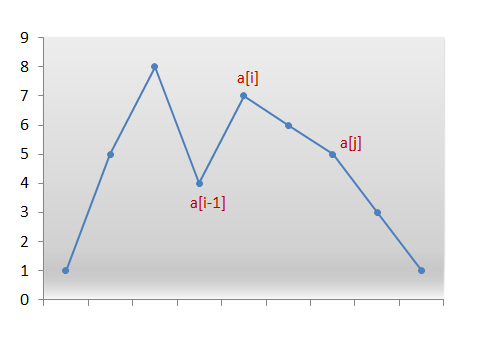

https://www.youtube.com/watch?v=LuLCLgMElus

In [140]:
def isDescSorted(nums):
    cur=nums[0]
    for i in range(1,len(nums)):
        if(nums[i]>=cur):
            return False
        cur=nums[i]
    return True 

def isSorted(nums):
    cur=nums[0]
    for i in range(1,len(nums)):
        if(nums[i]<=cur):
            return False
        cur=nums[i]
    return True

def reverseSequence(nums):
    return nums[::-1]

In [259]:
def nextPermutation(nums):
    # if already sorted in ascending order reverse last two digits
    if(isSorted(nums)):
        nums[-2::]=reverseSequence(nums[-2::])
        return nums
    
    # else if the sequence is sorted in descending order return reverse(sequence)
    elif(isDescSorted(nums)):
        nums=reverseSequence(nums)
        return nums
    
    #else
    else:
        # from the right side find the index where the number is lesser than it's right number 
        index=-1
        for i in range(1,len(nums)+1):
            if(i<len(nums) and nums[-i]>nums[-(i+1)]):
                index=-i-1
                pivot_num=nums[index]
                print('pivot num:',pivot_num,'index:',index)
                break   
                
        # find the next bigger number in the right side of the sequence
        # swap that number with pivot
        for i in range(1,-index):
            if(nums[-i]>pivot_num):
                nums[index]=nums[-i]
                nums[-i]=pivot_num
                print('next bigger number in right:',nums[-i])
                break
        print('after swapping:',nums) 
        # reverse the sequence after the pivot_index
        nums[index+1::]=reverseSequence(nums[index+1::]) 
        print('final result:')
        return nums    

In [260]:
nextPermutation([1,7,3,8,9])

pivot num: 8 index: -2
next bigger number in right: 8
after swapping: [1, 7, 3, 9, 8]
final result:


[1, 7, 3, 9, 8]

In [261]:
nextPermutation([1,3,2])

pivot num: 1 index: -3
next bigger number in right: 1
after swapping: [2, 3, 1]
final result:


[2, 1, 3]